In [1]:
!pip install prophet

c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
10:16:03 - cmdstanpy - INFO - Chain [1] start processing
10:16:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


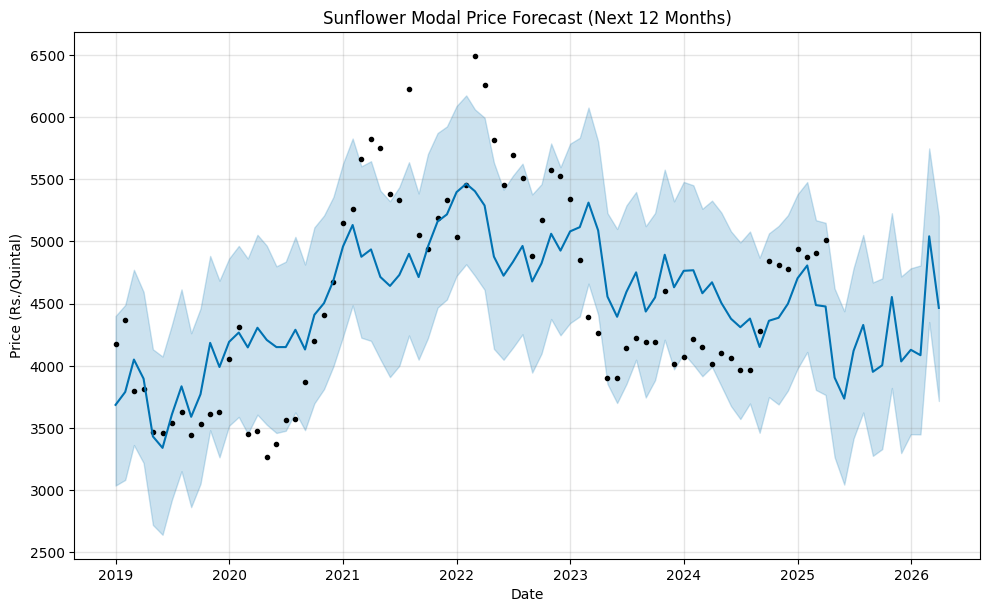

           ds         yhat   yhat_lower   yhat_upper
76 2025-04-30  3905.408813  3264.816933  4621.128788
77 2025-05-31  3735.991574  3044.575323  4439.117443
78 2025-06-30  4120.887567  3415.436891  4785.294339
79 2025-07-31  4328.626642  3624.423157  5052.542529
80 2025-08-31  3951.695286  3275.630853  4670.548091
81 2025-09-30  4004.475201  3329.758410  4703.049673
82 2025-10-31  4553.318673  3821.682211  5227.325756
83 2025-11-30  4035.310520  3297.792632  4718.483871
84 2025-12-31  4128.706094  3449.943731  4784.381993
85 2026-01-31  4085.323318  3448.459819  4807.181762
86 2026-02-28  5041.696362  4352.081505  5748.652651
87 2026-03-31  4465.796786  3716.920015  5202.684905


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("Sunflower_prices.csv")
df["Price Date"] = pd.to_datetime(df["Price Date"], errors='coerce')
df = df.dropna(subset=["Price Date"])

# Sort by date and group by month (averaging modal prices per month)
df_monthly = df.groupby(df["Price Date"].dt.to_period("M"))["Modal Price (Rs./Quintal)"].mean().reset_index()
df_monthly["Price Date"] = df_monthly["Price Date"].dt.to_timestamp()

# Prepare for Prophet
prophet_df = df_monthly.rename(columns={"Price Date": "ds", "Modal Price (Rs./Quintal)": "y"})

# Fit the model
model = Prophet()
model.fit(prophet_df)

# Make future dataframe for next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.title("Sunflower Modal Price Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Price (Rs./Quintal)")
plt.show()

# Optional: Print forecasted prices
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12))


In [3]:
# Convert 'ds' to datetime just in case
prophet_df["ds"] = pd.to_datetime(prophet_df["ds"])

# 1. Split data
train = prophet_df[:-12].copy()
test = prophet_df[-12:].copy()

# 2. Fit the model on training data
model = Prophet()
model.fit(train)

# 3. Forecast into the future
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 4. Round dates to month start to ensure exact match (optional but helps)
forecast["ds"] = forecast["ds"].dt.to_period("M").dt.to_timestamp()
test["ds"] = test["ds"].dt.to_period("M").dt.to_timestamp()

# 5. Set index for merging
forecast = forecast.set_index("ds")
test = test.set_index("ds")

# 6. Join and drop NaNs
merged = test.join(forecast[["yhat"]], how="inner").dropna()

# If still empty, debug by checking what dates are in each
if merged.empty:
    print("DEBUG: Test dates:", test.index)
    print("DEBUG: Forecast dates:", forecast.index)
    raise ValueError("Forecast and test dates do not overlap. Check alignment.")

# 7. Accuracy metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(merged["y"], merged["yhat"])
rmse = mean_squared_error(merged["y"], merged["yhat"]) ** 0.5
mape = np.mean(np.abs((merged["y"] - merged["yhat"]) / merged["y"])) * 100

print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")



10:16:09 - cmdstanpy - INFO - Chain [1] start processing
10:16:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MAE  (Mean Absolute Error):      785.68
RMSE (Root Mean Squared Error): 880.21
MAPE (Mean Absolute % Error):   16.84%


In [4]:
import pickle

# Save the trained model to a file
with open("sunflower_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as sunflower_price_model.pkl")


✅ Model saved as sunflower_price_model.pkl


In [ ]:
#Wheat

10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:53 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


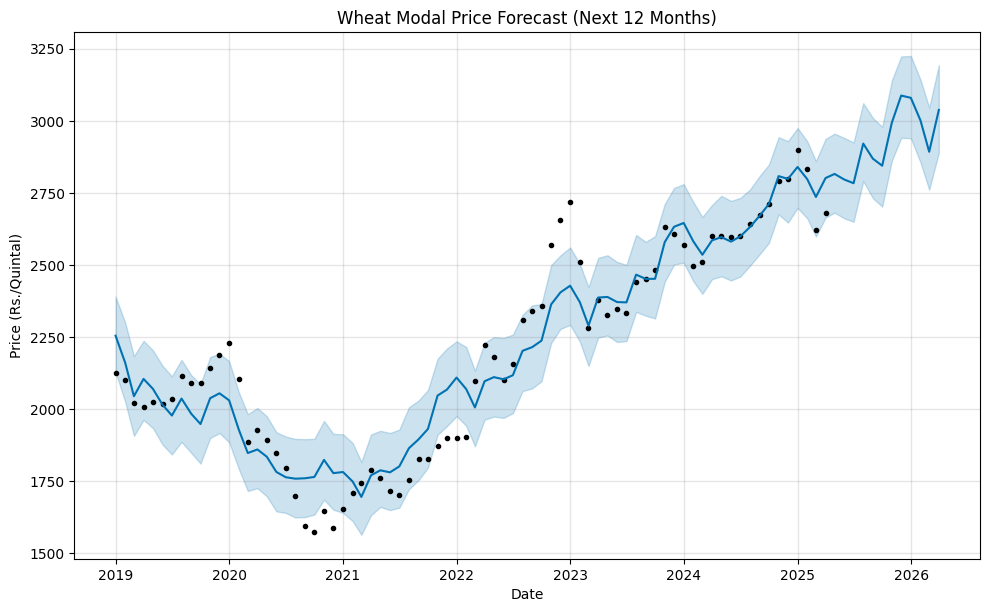

           ds         yhat   yhat_lower   yhat_upper
76 2025-04-30  2815.605167  2681.336154  2955.246041
77 2025-05-31  2796.266057  2661.659332  2940.614985
78 2025-06-30  2783.471815  2649.770369  2924.846065
79 2025-07-31  2920.887338  2790.779884  3060.985957
80 2025-08-31  2868.503645  2731.447097  3009.837598
81 2025-09-30  2844.160218  2702.348845  2978.865312
82 2025-10-31  2993.476682  2861.413463  3139.890149
83 2025-11-30  3087.382751  2940.833862  3222.913186
84 2025-12-31  3079.448328  2939.502812  3224.696491
85 2026-01-31  3001.085576  2855.439290  3142.333483
86 2026-02-28  2892.468361  2760.758377  3045.670713
87 2026-03-31  3037.754632  2889.201847  3192.964016


In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("Wheat_prices.csv")
df["Price Date"] = pd.to_datetime(df["Price Date"], errors='coerce')
df = df.dropna(subset=["Price Date"])

# Sort by date and group by month (averaging modal prices per month)
df_monthly = df.groupby(df["Price Date"].dt.to_period("M"))["Modal Price (Rs./Quintal)"].mean().reset_index()
df_monthly["Price Date"] = df_monthly["Price Date"].dt.to_timestamp()

# Prepare for Prophet
prophet_df = df_monthly.rename(columns={"Price Date": "ds", "Modal Price (Rs./Quintal)": "y"})

# Fit the model
model = Prophet()
model.fit(prophet_df)

# Make future dataframe for next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.title("Wheat Modal Price Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Price (Rs./Quintal)")
plt.show()

# Optional: Print forecasted prices
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12))


In [2]:
# Convert 'ds' to datetime just in case
prophet_df["ds"] = pd.to_datetime(prophet_df["ds"])

# 1. Split data
train = prophet_df[:-12].copy()
test = prophet_df[-12:].copy()

# 2. Fit the model on training data
model = Prophet()
model.fit(train)

# 3. Forecast into the future
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 4. Round dates to month start to ensure exact match (optional but helps)
forecast["ds"] = forecast["ds"].dt.to_period("M").dt.to_timestamp()
test["ds"] = test["ds"].dt.to_period("M").dt.to_timestamp()

# 5. Set index for merging
forecast = forecast.set_index("ds")
test = test.set_index("ds")

# 6. Join and drop NaNs
merged = test.join(forecast[["yhat"]], how="inner").dropna()

# If still empty, debug by checking what dates are in each
if merged.empty:
    print("DEBUG: Test dates:", test.index)
    print("DEBUG: Forecast dates:", forecast.index)
    raise ValueError("Forecast and test dates do not overlap. Check alignment.")

# 7. Accuracy metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(merged["y"], merged["yhat"])
rmse = mean_squared_error(merged["y"], merged["yhat"]) ** 0.5
mape = np.mean(np.abs((merged["y"] - merged["yhat"]) / merged["y"])) * 100

print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")



10:37:35 - cmdstanpy - INFO - Chain [1] start processing
10:37:35 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MAE  (Mean Absolute Error):      129.14
RMSE (Root Mean Squared Error): 162.12
MAPE (Mean Absolute % Error):   4.82%


In [3]:
import pickle

# Save the trained model to a file
with open("wheat_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as wheat_price_model.pkl")


✅ Model saved as wheat_price_model.pkl


In [14]:
#Groundnut


10:18:01 - cmdstanpy - INFO - Chain [1] start processing
10:18:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


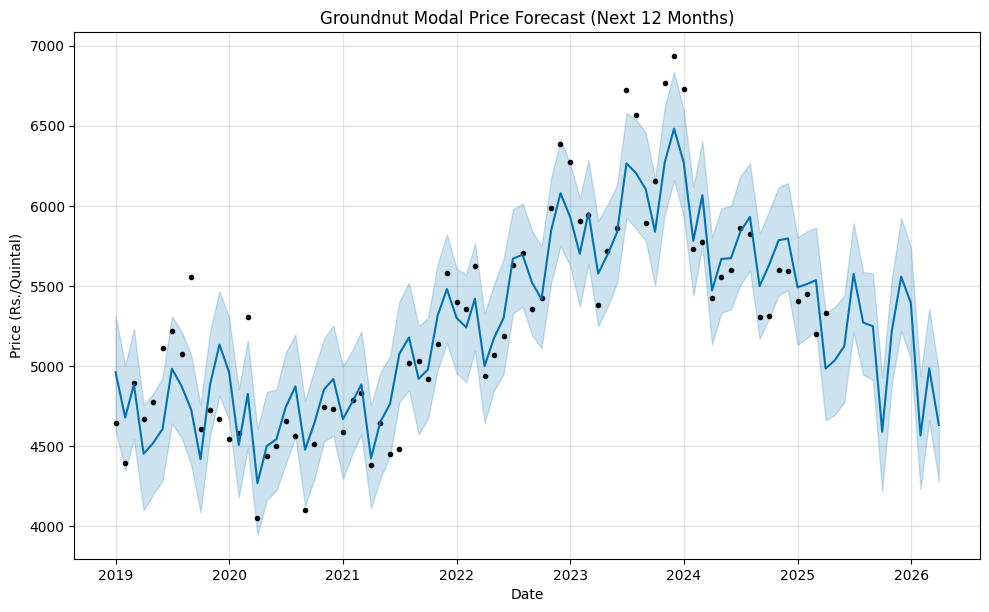

           ds         yhat   yhat_lower   yhat_upper
76 2025-04-30  5032.531086  4691.801898  5365.617795
77 2025-05-31  5121.043714  4772.335946  5438.503674
78 2025-06-30  5573.340256  5208.077785  5889.531083
79 2025-07-31  5269.196732  4944.457251  5585.863503
80 2025-08-31  5246.891261  4910.986660  5576.192703
81 2025-09-30  4588.422365  4216.759792  4925.657117
82 2025-10-31  5217.942538  4888.715419  5548.672257
83 2025-11-30  5556.226667  5217.258544  5922.111157
84 2025-12-31  5392.578743  5043.149967  5739.979058
85 2026-01-31  4563.947233  4229.714776  4936.480775
86 2026-02-28  4983.717238  4659.065167  5357.122387
87 2026-03-31  4629.834658  4276.034610  4966.779592


In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("Groundnut_prices.csv")
df["Price Date"] = pd.to_datetime(df["Price Date"], errors='coerce')
df = df.dropna(subset=["Price Date"])

# Sort by date and group by month (averaging modal prices per month)
df_monthly = df.groupby(df["Price Date"].dt.to_period("M"))["Modal Price (Rs./Quintal)"].mean().reset_index()
df_monthly["Price Date"] = df_monthly["Price Date"].dt.to_timestamp()

# Prepare for Prophet
prophet_df = df_monthly.rename(columns={"Price Date": "ds", "Modal Price (Rs./Quintal)": "y"})

# Fit the model
model = Prophet()
model.fit(prophet_df)

# Make future dataframe for next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.title("Groundnut Modal Price Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Price (Rs./Quintal)")
plt.show()

# Optional: Print forecasted prices
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12))


In [9]:
# Convert 'ds' to datetime just in case
prophet_df["ds"] = pd.to_datetime(prophet_df["ds"])

# 1. Split data
train = prophet_df[:-12].copy()
test = prophet_df[-12:].copy()

# 2. Fit the model on training data
model = Prophet()
model.fit(train)

# 3. Forecast into the future
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 4. Round dates to month start to ensure exact match (optional but helps)
forecast["ds"] = forecast["ds"].dt.to_period("M").dt.to_timestamp()
test["ds"] = test["ds"].dt.to_period("M").dt.to_timestamp()

# 5. Set index for merging
forecast = forecast.set_index("ds")
test = test.set_index("ds")

# 6. Join and drop NaNs
merged = test.join(forecast[["yhat"]], how="inner").dropna()

# If still empty, debug by checking what dates are in each
if merged.empty:
    print("DEBUG: Test dates:", test.index)
    print("DEBUG: Forecast dates:", forecast.index)
    raise ValueError("Forecast and test dates do not overlap. Check alignment.")

# 7. Accuracy metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(merged["y"], merged["yhat"])
rmse = mean_squared_error(merged["y"], merged["yhat"]) ** 0.5
mape = np.mean(np.abs((merged["y"] - merged["yhat"]) / merged["y"])) * 100

print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")



10:18:14 - cmdstanpy - INFO - Chain [1] start processing
10:18:14 - cmdstanpy - INFO - Chain [1] done processing


MAE  (Mean Absolute Error):      1327.55
RMSE (Root Mean Squared Error): 1376.12
MAPE (Mean Absolute % Error):   24.21%


c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [13]:
import pickle

# Save the trained model to a file
with open("groundnut_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as groundnut_price_model.pkl")


✅ Model saved as groundnut_price_model.pkl


In [ ]:
#rice

10:22:13 - cmdstanpy - INFO - Chain [1] start processing
10:22:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


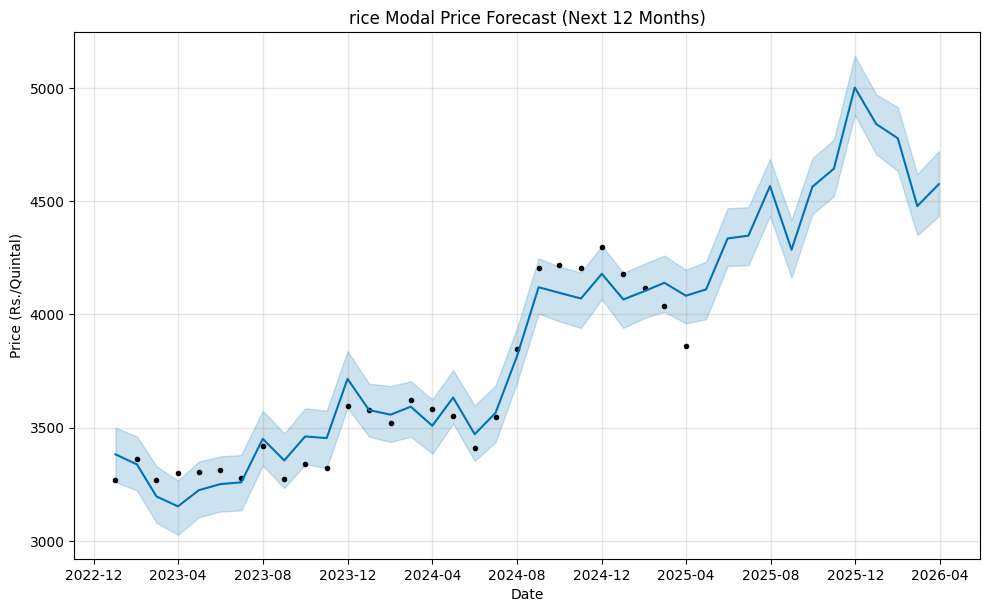

           ds         yhat   yhat_lower   yhat_upper
28 2025-04-30  4110.125646  3978.717513  4232.567854
29 2025-05-31  4335.000738  4213.165839  4468.335572
30 2025-06-30  4347.274325  4217.077218  4472.994290
31 2025-07-31  4566.116587  4434.874589  4685.368636
32 2025-08-31  4285.455415  4162.208253  4415.919374
33 2025-09-30  4562.779819  4442.714083  4688.799821
34 2025-10-31  4643.097729  4521.365694  4770.773367
35 2025-11-30  5001.304909  4880.582015  5140.543857
36 2025-12-31  4839.832734  4706.194843  4970.544002
37 2026-01-31  4776.931871  4632.856883  4914.047631
38 2026-02-28  4477.747465  4349.064498  4618.794808
39 2026-03-31  4574.577890  4433.939399  4721.086370


In [15]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("rice.csv")
df["Price Date"] = pd.to_datetime(df["Price Date"], errors='coerce')
df = df.dropna(subset=["Price Date"])

# Sort by date and group by month (averaging modal prices per month)
df_monthly = df.groupby(df["Price Date"].dt.to_period("M"))["Modal Price (Rs./Quintal)"].mean().reset_index()
df_monthly["Price Date"] = df_monthly["Price Date"].dt.to_timestamp()

# Prepare for Prophet
prophet_df = df_monthly.rename(columns={"Price Date": "ds", "Modal Price (Rs./Quintal)": "y"})

# Fit the model
model = Prophet()
model.fit(prophet_df)

# Make future dataframe for next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.title("rice Modal Price Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Price (Rs./Quintal)")
plt.show()

# Optional: Print forecasted prices
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12))


In [16]:
# Convert 'ds' to datetime just in case
prophet_df["ds"] = pd.to_datetime(prophet_df["ds"])

# 1. Split data
train = prophet_df[:-12].copy()
test = prophet_df[-12:].copy()

# 2. Fit the model on training data
model = Prophet()
model.fit(train)

# 3. Forecast into the future
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 4. Round dates to month start to ensure exact match (optional but helps)
forecast["ds"] = forecast["ds"].dt.to_period("M").dt.to_timestamp()
test["ds"] = test["ds"].dt.to_period("M").dt.to_timestamp()

# 5. Set index for merging
forecast = forecast.set_index("ds")
test = test.set_index("ds")

# 6. Join and drop NaNs
merged = test.join(forecast[["yhat"]], how="inner").dropna()

# If still empty, debug by checking what dates are in each
if merged.empty:
    print("DEBUG: Test dates:", test.index)
    print("DEBUG: Forecast dates:", forecast.index)
    raise ValueError("Forecast and test dates do not overlap. Check alignment.")

# 7. Accuracy metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(merged["y"], merged["yhat"])
rmse = mean_squared_error(merged["y"], merged["yhat"]) ** 0.5
mape = np.mean(np.abs((merged["y"] - merged["yhat"]) / merged["y"])) * 100

print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")



10:22:28 - cmdstanpy - INFO - Chain [1] start processing
10:22:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MAE  (Mean Absolute Error):      217.55
RMSE (Root Mean Squared Error): 249.03
MAPE (Mean Absolute % Error):   5.47%


In [17]:
import pickle

# Save the trained model to a file
with open("rice_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as rice_price_model.pkl")


✅ Model saved as rice_price_model.pkl


In [18]:
#soyabean

10:24:00 - cmdstanpy - INFO - Chain [1] start processing
10:24:01 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


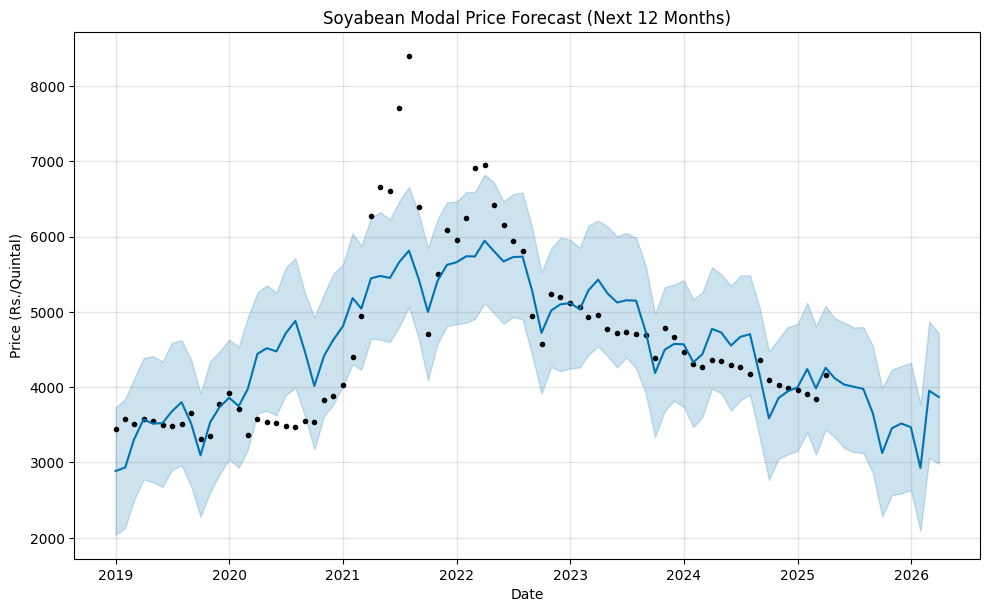

           ds         yhat   yhat_lower   yhat_upper
76 2025-04-30  4118.777555  3335.192014  4915.393703
77 2025-05-31  4033.567104  3190.893808  4860.217116
78 2025-06-30  4005.194369  3134.644803  4791.711401
79 2025-07-31  3977.448264  3126.647408  4797.301675
80 2025-08-31  3652.832404  2857.748408  4544.988303
81 2025-09-30  3124.045015  2278.442243  3987.368590
82 2025-10-31  3453.969873  2563.962638  4232.142737
83 2025-11-30  3517.072306  2588.942552  4280.323151
84 2025-12-31  3468.642657  2633.103842  4323.101427
85 2026-01-31  2925.418854  2086.173171  3772.379273
86 2026-02-28  3952.749179  3059.221811  4872.599449
87 2026-03-31  3867.753556  2983.616321  4712.218663


In [19]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("Soyabean_prices.csv")
df["Price Date"] = pd.to_datetime(df["Price Date"], errors='coerce')
df = df.dropna(subset=["Price Date"])

# Sort by date and group by month (averaging modal prices per month)
df_monthly = df.groupby(df["Price Date"].dt.to_period("M"))["Modal Price (Rs./Quintal)"].mean().reset_index()
df_monthly["Price Date"] = df_monthly["Price Date"].dt.to_timestamp()

# Prepare for Prophet
prophet_df = df_monthly.rename(columns={"Price Date": "ds", "Modal Price (Rs./Quintal)": "y"})

# Fit the model
model = Prophet()
model.fit(prophet_df)

# Make future dataframe for next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.title("Soyabean Modal Price Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Price (Rs./Quintal)")
plt.show()

# Optional: Print forecasted prices
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12))


In [20]:
# Convert 'ds' to datetime just in case
prophet_df["ds"] = pd.to_datetime(prophet_df["ds"])

# 1. Split data
train = prophet_df[:-12].copy()
test = prophet_df[-12:].copy()

# 2. Fit the model on training data
model = Prophet()
model.fit(train)

# 3. Forecast into the future
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 4. Round dates to month start to ensure exact match (optional but helps)
forecast["ds"] = forecast["ds"].dt.to_period("M").dt.to_timestamp()
test["ds"] = test["ds"].dt.to_period("M").dt.to_timestamp()

# 5. Set index for merging
forecast = forecast.set_index("ds")
test = test.set_index("ds")

# 6. Join and drop NaNs
merged = test.join(forecast[["yhat"]], how="inner").dropna()

# If still empty, debug by checking what dates are in each
if merged.empty:
    print("DEBUG: Test dates:", test.index)
    print("DEBUG: Forecast dates:", forecast.index)
    raise ValueError("Forecast and test dates do not overlap. Check alignment.")

# 7. Accuracy metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(merged["y"], merged["yhat"])
rmse = mean_squared_error(merged["y"], merged["yhat"]) ** 0.5
mape = np.mean(np.abs((merged["y"] - merged["yhat"]) / merged["y"])) * 100

print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")



10:24:15 - cmdstanpy - INFO - Chain [1] start processing
10:24:15 - cmdstanpy - INFO - Chain [1] done processing


MAE  (Mean Absolute Error):      497.45
RMSE (Root Mean Squared Error): 612.38
MAPE (Mean Absolute % Error):   12.27%


c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [21]:
import pickle

# Save the trained model to a file
with open("soyabean_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as soyabean_price_model.pkl")


✅ Model saved as soyabean_price_model.pkl


In [1]:
#maize


c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
10:30:47 - cmdstanpy - INFO - Chain [1] start processing
10:30:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


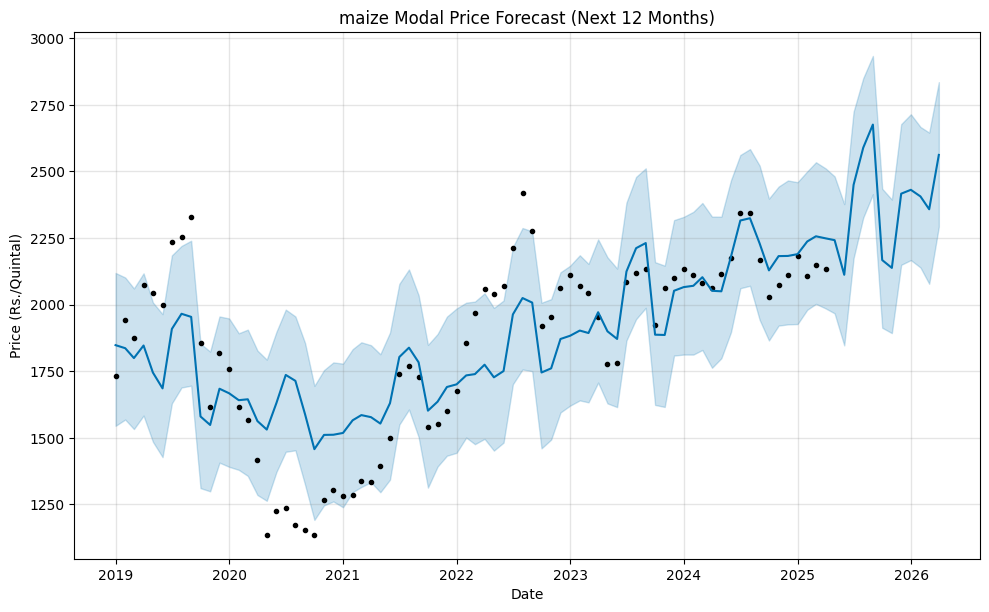

           ds         yhat   yhat_lower   yhat_upper
76 2025-04-30  2242.093572  1967.159398  2481.519907
77 2025-05-31  2111.995847  1846.731271  2377.462861
78 2025-06-30  2449.802586  2174.319983  2724.527922
79 2025-07-31  2589.288042  2326.499045  2850.399485
80 2025-08-31  2676.107919  2414.424932  2933.937983
81 2025-09-30  2167.224106  1913.056170  2435.142575
82 2025-10-31  2137.878797  1892.965586  2394.483084
83 2025-11-30  2416.611439  2149.397131  2677.770981
84 2025-12-31  2431.140369  2167.163143  2714.890749
85 2026-01-31  2406.237526  2139.352067  2667.131076
86 2026-02-28  2358.028778  2078.153468  2646.022506
87 2026-03-31  2562.252550  2292.885755  2835.598395


In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("maize_prices.csv")
df["Price Date"] = pd.to_datetime(df["Price Date"], errors='coerce')
df = df.dropna(subset=["Price Date"])

# Sort by date and group by month (averaging modal prices per month)
df_monthly = df.groupby(df["Price Date"].dt.to_period("M"))["Modal Price (Rs./Quintal)"].mean().reset_index()
df_monthly["Price Date"] = df_monthly["Price Date"].dt.to_timestamp()

# Prepare for Prophet
prophet_df = df_monthly.rename(columns={"Price Date": "ds", "Modal Price (Rs./Quintal)": "y"})

# Fit the model
model = Prophet()
model.fit(prophet_df)

# Make future dataframe for next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.title("maize Modal Price Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Price (Rs./Quintal)")
plt.show()

# Optional: Print forecasted prices
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12))


In [2]:
# Convert 'ds' to datetime just in case
prophet_df["ds"] = pd.to_datetime(prophet_df["ds"])

# 1. Split data
train = prophet_df[:-12].copy()
test = prophet_df[-12:].copy()

# 2. Fit the model on training data
model = Prophet()
model.fit(train)

# 3. Forecast into the future
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 4. Round dates to month start to ensure exact match (optional but helps)
forecast["ds"] = forecast["ds"].dt.to_period("M").dt.to_timestamp()
test["ds"] = test["ds"].dt.to_period("M").dt.to_timestamp()

# 5. Set index for merging
forecast = forecast.set_index("ds")
test = test.set_index("ds")

# 6. Join and drop NaNs
merged = test.join(forecast[["yhat"]], how="inner").dropna()

# If still empty, debug by checking what dates are in each
if merged.empty:
    print("DEBUG: Test dates:", test.index)
    print("DEBUG: Forecast dates:", forecast.index)
    raise ValueError("Forecast and test dates do not overlap. Check alignment.")

# 7. Accuracy metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(merged["y"], merged["yhat"])
rmse = mean_squared_error(merged["y"], merged["yhat"]) ** 0.5
mape = np.mean(np.abs((merged["y"] - merged["yhat"]) / merged["y"])) * 100

print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")



10:31:02 - cmdstanpy - INFO - Chain [1] start processing
10:31:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MAE  (Mean Absolute Error):      195.43
RMSE (Root Mean Squared Error): 220.75
MAPE (Mean Absolute % Error):   9.06%


In [4]:
import pickle

# Save the trained model to a file
with open("maize_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as maize_price_model.pkl")


✅ Model saved as maize_price_model.pkl


c:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



📈 Forecasted Maize Prices for Next 12 Months:
           ds         yhat   yhat_lower   yhat_upper
64 2024-04-30  6112.054616  5759.344535  6456.148403
65 2024-05-31  6322.692770  5965.292200  6700.320510
66 2024-06-30  6902.271025  6571.860394  7211.601011
67 2024-07-31  6783.065407  6427.054930  7144.612021
68 2024-08-31  6806.544191  6442.452659  7154.937930
69 2024-09-30  6391.206387  6055.673908  6743.236880
70 2024-10-31  7019.593105  6699.651465  7388.082163
71 2024-11-30  7296.460132  6941.022184  7648.128619
72 2024-12-31  7134.710659  6797.875677  7507.156697
73 2025-01-31  6464.940453  6099.182634  6837.577753
74 2025-02-28  7254.297991  6883.341122  7601.202352
75 2025-03-31  6917.011967  6543.297884  7275.445347


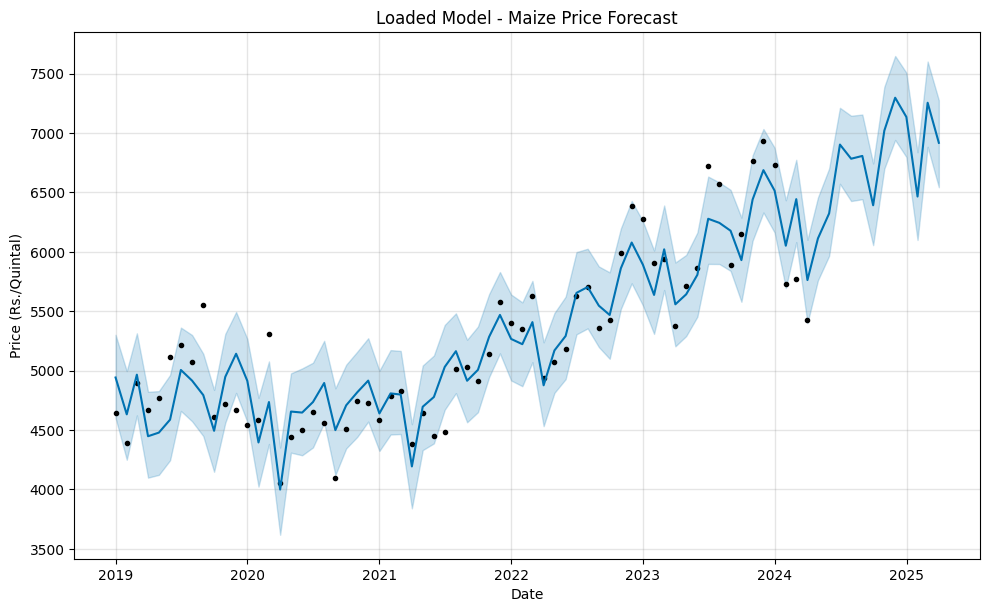

In [4]:
import pickle
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the saved model
with open("C:/Users/Ankita/Desktop/crop_price_yield_final/final_crop/models/groundnut_price_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Create future dataframe for next 12 months
future = loaded_model.make_future_dataframe(periods=12, freq='M')

# Make predictions
forecast = loaded_model.predict(future)

# Show forecasted results
forecast_summary = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12)
print("\n📈 Forecasted Maize Prices for Next 12 Months:")
print(forecast_summary)

# Optional: Plot forecast again
loaded_model.plot(forecast)
plt.title("Loaded Model - Maize Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price (Rs./Quintal)")
plt.show()
